In [21]:
import pandas
#from xgboost import xg
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.externals.six import StringIO
from IPython.display import Image

data = pd.read_csv('Real_Estate_Sales_2001-2016.csv', delimiter=',' , encoding='latin-1')
data = pd.DataFrame(data)
print(data.head())

data.dropna(subset=['SaleAmount','SalesRatio'])
data['ListYear'] = data['ListYear'].fillna(0)
data['AssessedValue'] = data['AssessedValue'].fillna(0)
data['SaleAmount'] = data['SaleAmount'].fillna(0)
data['SalesRatio'] = data['SalesRatio'].fillna(0)

#transform to numerical values - 
#data['ListYear'] = pd.to_numeric(data['ListYear'])
#data['AssessedValue'] = data['AssessedValue'].astype(float)
data['SaleAmount'] = data['SaleAmount'].astype(int)
#data['SalesRatio'] = data['SalesRatio'].astype(float)


#Drop the variables which do not add any meaning - 
data = data.drop(['SerialNumber'], axis=1)#meaningless - its an ID

#Define the X and Y variables - 
Y = data['SalesRatio']
X = data
X = X.drop(['SalesRatio'], axis=1)

# Fit/Transform - Y var
number = LabelEncoder()
Y = number.fit_transform(Y)

# Adjust / Fill the NA values - 
X['ResidentialType'] = X['ResidentialType'].fillna('')
X['NonUseCode'] = X['NonUseCode'].fillna('')
X['PropertyType'] = X['PropertyType'].fillna('')

# Fit/Transform the X categorical variables -
number = LabelEncoder()
townLabels = X['Town'].values
X['Town'] = number.fit_transform(X['Town'])
mappedTownLabels = X['Town'].values

X['PropertyType'] = number.fit_transform(X['PropertyType'])
X['ResidentialType'] = number.fit_transform(X['ResidentialType'])
X['NonUseCode'] = number.fit_transform(X['NonUseCode'])

#TODO - Exact geolocation - convert to Latitude/Longitude.
# for now address can be dropped - 
X = X.drop(['Address'], axis=1)


   ID  SerialNumber  ListYear            DateRecorded     Town  \
0   1         14046      2014  09/29/2015 12:00:00 AM  Andover   
1   2        900035      2009  07/20/2010 12:00:00 AM  Andover   
2   3         14011      2014  01/14/2015 12:00:00 AM  Andover   
3   4         80009      2008  01/21/2009 12:00:00 AM  Andover   
4   5         15006      2015  11/30/2015 12:00:00 AM  Andover   

                       Address  AssessedValue  SaleAmount  SalesRatio  \
0   US ROUTE 6  M 33 B 36 L 22        10720.0     75000.0    0.142933   
1              1 DOGWOOD DRIVE        55600.0     99000.0    0.561616   
2              1 JUROVATY LANE       153100.0    190000.0    0.805789   
3                  1 ROSE LANE       116600.0    138900.0    0.839453   
4                  1 ROSE LANE       102900.0     50000.0    2.058000   

  PropertyType ResidentialType        NonUseCode  \
0  Vacant Land             NaN               NaN   
1  Vacant Land             NaN               NaN   
2  Resid

['Andover' 'Andover' 'Andover' ... 'Woodstock' 'Woodstock' 'Woodstock']
[  0   0   0 ... 168 168 168]


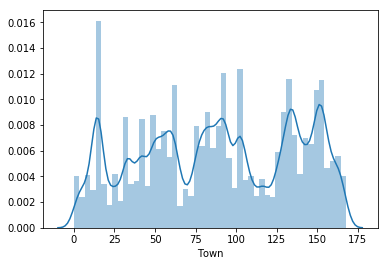

In [22]:

import seaborn as sns
sales = X['Town']
sns.distplot(sales);
print(townLabels)
print(mappedTownLabels)
# create output matrix to show a legend of the cities. 

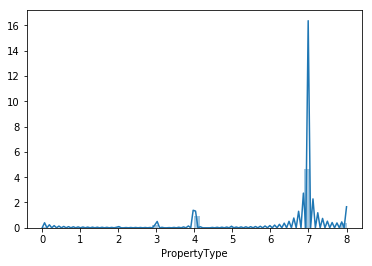

In [18]:
import seaborn as sns
sales = X['PropertyType']
sns.distplot(sales);

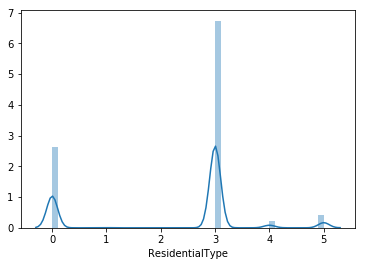

In [20]:
import seaborn as sns
sales = X['ResidentialType']
sns.distplot(sales);